In [1]:
import numpy as np
import matplotlib.pyplot as plt

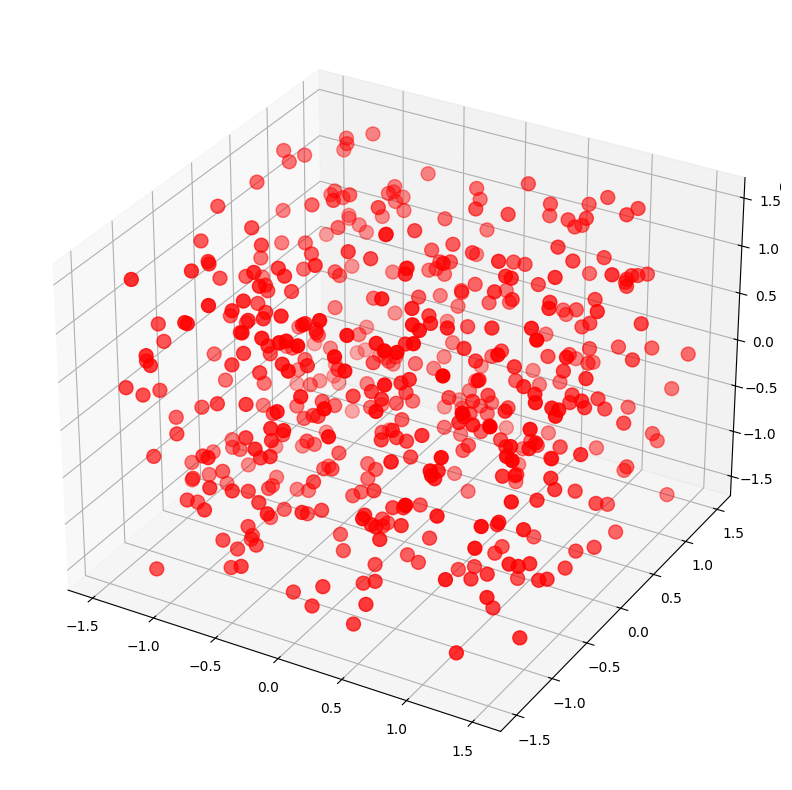

In [2]:
# generate some bubbles in the 3D space

n = 500
St0 = 0.5

np.random.seed(0)
XP0 = np.random.uniform(-1.5, 1.5, n)
YP0 = np.random.uniform(-1.5, 1.5, n)
ZP0 = np.random.uniform(-1.5, 1.5, n)

# XP0 = np.linspace(-1.5, 1.5, n)
# YP0 = np.linspace(-1.5, 1.5, n)
# ZP0 = np.linspace(-1.5, 1.5, n)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(XP0, YP0, ZP0, s=100, c='r', marker='o')

bubbles_df = np.zeros((n, 8))
bubbles_df[:, 1:4] = np.vstack([XP0, YP0, ZP0]).T
bubbles_df[:, -1] = St0



/home/zhizhi/miniconda3/lib/python3.9/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


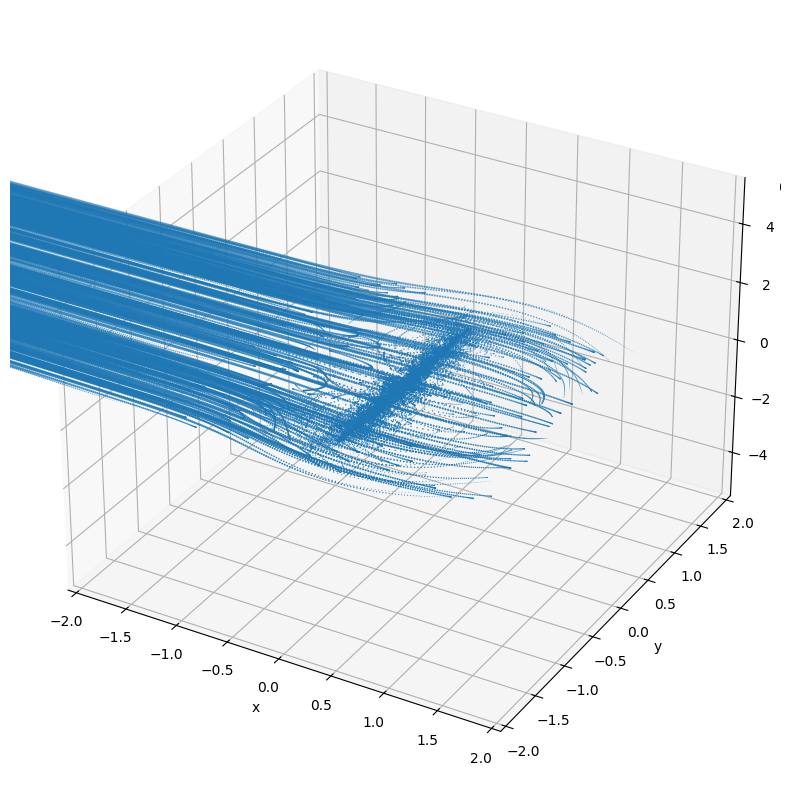

In [3]:
import advect_bubbles_3D_eval as adv3D_eval
from multiprocessing import Pool

t0 = 0
tf = 8

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')


out = adv3D_eval.advect_bubbles(bubbles_df, t0, tf, plot_path=True, this_ax=ax)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


x_core, y_core, y_core_lower, x_ring, y_ring = np.load('velocity_results/alpha04_2D_geometry.npy').T
boundary_points = np.array([x_core, y_core]).T

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def rotate_points_2d(points, angle):
    # Define the 2D rotation matrix
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                 [np.sin(angle), np.cos(angle)]])
    # Apply rotation to each point
    rotated_points = np.dot(points, rotation_matrix.T)
    return rotated_points

def generate_3d_annulus(boundary_points, num_points_around, num_points_along):
    # Convert boundary points to numpy array for easier manipulation
    boundary_points = np.array(boundary_points)
    
    # Calculate the angle increment for rotation
    angle_increment = 2 * np.pi / num_points_around
    
    # Generate points around the annulus
    points_around = []
    for i in range(num_points_around):
        angle = i * angle_increment
        rotated_boundary = rotate_points_2d(boundary_points, angle)
        points_around.append(rotated_boundary)
    
    points_around = np.array(points_around)
    
    # Interpolate points along the annulus
    t = np.linspace(0, 1, num_points_along)
    interpolated_points = []
    for i in range(num_points_along):
        interpolated_points.append((1 - t[i]) * points_around[:, :-1] + t[i] * points_around[:, 1:])
    interpolated_points = np.array(interpolated_points)
    
    # Reshape for plotting
    interpolated_points = np.reshape(interpolated_points, (-1, 2))
    
    # Add height dimension
    height = np.zeros(interpolated_points.shape[0]).reshape((-1,1))
    interpolated_points_3d = np.hstack((interpolated_points, height))
    
    return interpolated_points_3d

# Example boundary points representing the annulus cross-section
# boundary_points = [[1, 0], [0.8, 0.5], [0, 1], [-0.8, 0.5], [-1, 0], [-0.8, -0.5], [0, -1], [0.8, -0.5], [1, 0]]
num_points_around = 50  # Number of points around the annulus
num_points_along = 20    # Number of points along the height of the annulus

# Generate 3D annulus points
annulus_points = generate_3d_annulus(boundary_points, num_points_around, num_points_along)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(annulus_points[:,2], annulus_points[:,1], annulus_points[:,0], color='b')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


: 

In [4]:


for t in range(out.shape[2]):
    fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(5, 5))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(out[:, 0, t], out[:, 1, t], out[:, 2, t], s=1, c='r', marker='o')
    ax.set_aspect('equal')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_zlim(-2, 2)
    plt.savefig('temp_3D/frame_{}.png'.format(t), dpi=300)
    plt.close()

In [10]:
inside = out[:, 0, -1]**2 + out[:, 1, -1]**2 + out[:, 2, -1]**2 < 2**2
np.min(out[inside, 1, -1])

-0.0012941705811762207